In [ ]:
import numpy as np
import scipy.signal
from scipy.optimize import minimize
from google.colab import drive

from google.colab import drive
drive.mount('/content/drive')

# Function to read input signal from file
def read_signal(file_path):
    with open(file_path, 'r') as file:
        signal = [float(line.strip()) for line in file.readlines()]
    return signal

# Function to implement low-pass filter
def low_pass_filter(signal, cutoff_freq, sampling_freq, filter_order):
    nyquist_freq = 0.5 * sampling_freq
    norm_cutoff_freq = cutoff_freq / nyquist_freq
    b, a = scipy.signal.cheby1(filter_order, 0.5, norm_cutoff_freq, btype='low')
    filtered_signal = scipy.signal.lfilter(b, a, signal)
    return filtered_signal

# Function to implement high-pass filter
def high_pass_filter(signal, cutoff_freq, sampling_freq, filter_order):
    nyquist_freq = 0.5 * sampling_freq
    norm_cutoff_freq = cutoff_freq / nyquist_freq
    b, a = scipy.signal.cheby1(filter_order, 0.5, norm_cutoff_freq, btype='high')
    filtered_signal = scipy.signal.lfilter(b, a, signal)
    return filtered_signal

# Function to implement band-pass filter
def band_pass_filter(signal, low_cutoff_freq, high_cutoff_freq, sampling_freq, filter_order):
    nyquist_freq = 0.5 * sampling_freq
    norm_low_cutoff_freq = low_cutoff_freq / nyquist_freq
    norm_high_cutoff_freq = high_cutoff_freq / nyquist_freq
    b, a = scipy.signal.cheby1(filter_order, 0.5, [norm_low_cutoff_freq, norm_high_cutoff_freq], btype='band')
    filtered_signal = scipy.signal.lfilter(b, a, signal)
    return filtered_signal

# Function to calculate correlation between two signals
def calculate_correlation(signal1, signal2):
    correlation = np.corrcoef(signal1, signal2)[0, 1]
    return correlation

# Function to calculate cost (negative correlation) for optimization
def cost_function(params):
    cutoff_freq, filter_order = params
    # Filter input signal using low-pass filter
    filtered_low_pass = low_pass_filter(input_signal, cutoff_freq, sampling_freq, int(filter_order))
    # Filter input signal using high-pass filter
    filtered_high_pass = high_pass_filter(input_signal, cutoff_freq, sampling_freq, int(filter_order))
    # Filter input signal using band-pass filter
    filtered_band_pass = band_pass_filter(input_signal, 0.1 * cutoff_freq, cutoff_freq, sampling_freq, int(filter_order))

    # Calculate average correlation between filtered signals and output signal
    correlation_low_pass = calculate_correlation(filtered_low_pass, output_signal)
    correlation_high_pass = calculate_correlation(filtered_high_pass, output_signal)
    correlation_band_pass = calculate_correlation(filtered_band_pass, output_signal)

    # Average the correlations from different filters
    avg_correlation = (correlation_low_pass + correlation_high_pass + correlation_band_pass) / 3

    # Since we are minimizing the cost, return negative correlation
    return -avg_correlation

# Mount Google Drive
drive.mount('/content/drive')

# File paths in your Google Drive
input_signal_path = '/content/drive/MyDrive/INPUT-SIGNAL-X(t).txt'
output_signal_path = '/content/drive/MyDrive/OUTPUT-SIGNAL-Y(t).txt'

# Load input and output signals
input_signal = read_signal(input_signal_path)
output_signal = read_signal(output_signal_path)

# Define the sampling frequency
sampling_freq = 500  # Replace with the actual sampling frequency in Hz

# Define initial guess and bounds for optimization
initial_guess = [50, 5]  # Initial guess for cutoff frequency and filter order
bounds = [(40, 60), (2, 10)]  # Bounds for cutoff frequency and filter order

# Perform optimization
result = minimize(cost_function, initial_guess, method='Nelder-Mead', bounds=bounds)

# Get the optimized filter parameters
best_filter_params = {
    'cutoff_freq': result.x[0],
    'filter_order': int(result.x[1])
}

# Filter input signal using the optimized parameters
filtered_low_pass = low_pass_filter(input_signal, best_filter_params['cutoff_freq'], sampling_freq, best_filter_params['filter_order'])
filtered_high_pass = high_pass_filter(input_signal, best_filter_params['cutoff_freq'], sampling_freq, best_filter_params['filter_order'])
filtered_band_pass = band_pass_filter(input_signal, 0.1 * best_filter_params['cutoff_freq'], best_filter_params['cutoff_freq'], sampling_freq, best_filter_params['filter_order'])

# Calculate correlation between filtered signals and output signal
correlation_low_pass = calculate_correlation(filtered_low_pass, output_signal)
correlation_high_pass = calculate_correlation(filtered_high_pass, output_signal)
correlation_band_pass = calculate_correlation(filtered_band_pass, output_signal)

# Print the best average correlation and corresponding filter parameters
print("Best Average Correlation:", -result.fun)
print("Best Filter Parameters:", best_filter_params)
print("Correlation for Low Pass Filter:", correlation_low_pass)
print("Correlation for High Pass Filter:", correlation_high_pass)
print("Correlation for Band Pass Filter:", correlation_band_pass)


Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Best Average Correlation: 0.05025619391867611
Best Filter Parameters: {'cutoff_freq': 57.14982798555866, 'filter_order': 5}
Correlation for Low Pass Filter: -0.21814883232671417
Correlation for High Pass Filter: 0.00011403311784843069
Correlation for Band Pass Filter: 0.36880338096489407
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Best Average Correlation: 0.05025619391867611
Best Filter Parameters: {'cutoff_freq': 57.14982798555866, 'filter_order': 5}
Correlation for Low Pass Filter: -0.21814883232671417
Correlation for High Pass Filter: 0.00011403311784843069
Correlation for Band Pass Filter: 0.36880338096489407


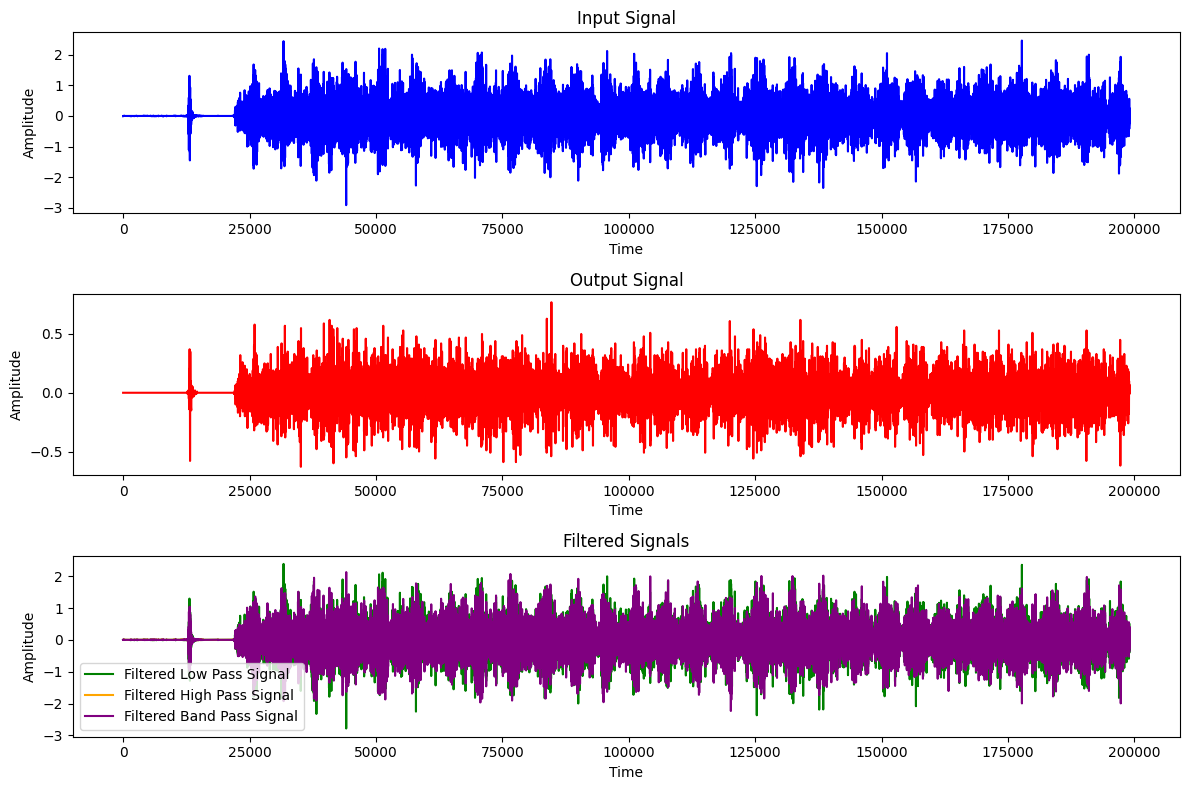

In [ ]:
import matplotlib.pyplot as plt

# Plot input signal, output signal, and filtered signals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(input_signal, color='blue', label='Input Signal (x(t))')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input Signal')

plt.subplot(3, 1, 2)
plt.plot(output_signal, color='red', label='Output Signal (y(t))')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Output Signal')

plt.subplot(3, 1, 3)
plt.plot(filtered_low_pass, color='green', label='Filtered Low Pass Signal')
plt.plot(filtered_high_pass, color='orange', label='Filtered High Pass Signal')
plt.plot(filtered_band_pass, color='purple', label='Filtered Band Pass Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Filtered Signals')
plt.legend()

plt.tight_layout()
plt.show()



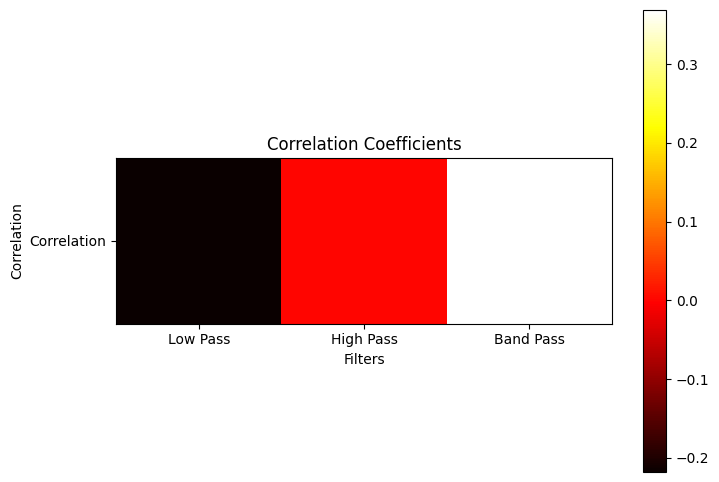

In [ ]:
correlation_matrix = np.array([[correlation_low_pass, correlation_high_pass, correlation_band_pass]])
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.title('Correlation Coefficients')
plt.xlabel('Filters')
plt.ylabel('Correlation')
plt.colorbar()
plt.xticks(np.arange(3), ['Low Pass', 'High Pass', 'Band Pass'])
plt.yticks([0], ['Correlation'])
plt.show()